In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import trange
from math import erf

$\frac{\partial U}{\partial t} = a^2\frac{\partial^2 U}{\partial x^2}$

In [2]:
# second derivatives
def second_deriv_2(U, h):
    return (U[:-2] - 2. * U[1:-1] + U[2:]) / h ** 2, 1, -1
def second_deriv_4(U, h):
    return (U[:-6] / 90. + U[6:] / 90. - 3. * U[1:-5] / 20. - 3. * U[5:-1] / 20 + 3. / 2. * U[2:-4] + 3. / 2. * U[4:-2] - 49. / 18. * U[3:-3]) / h ** 2, 3, -3

In [3]:
# time derivatives
def runge_kutta_4(U, h, c, r, Deriv):
    dt = r * h ** 2
    k1 = np.zeros_like(U)
    k2 = np.zeros_like(U)
    k3 = np.zeros_like(U)
    k4 = np.zeros_like(U)
    temp1, idx_l, idx_r = Deriv(U, h)
    k1[idx_l:idx_r] = temp1
    temp2, idx_l, idx_r = Deriv(U + c * dt * k1 / 2., h)
    k2[idx_l:idx_r] = temp2
    temp3, idx_l, idx_r = Deriv(U + c * dt * k2 / 2., h)
    k3[idx_l:idx_r] = temp3
    temp4, idx_l, idx_r = Deriv(U + c * dt * k3, h)
    k4[idx_l:idx_r] = temp4
    return U + c * dt * k1 / 6. + c * dt * k2 / 3. + c * dt * k3 / 3. + c * dt * k4 / 6., dt, 0, None
def runge_kutta_7(U, h, c, r, Deriv):
    dt = r * h ** 2
    k1 = np.zeros_like(U)
    k2 = np.zeros_like(U)
    k3 = np.zeros_like(U)
    k4 = np.zeros_like(U)
    k5 = np.zeros_like(U)
    k6 = np.zeros_like(U)
    k7 = np.zeros_like(U)
    k8 = np.zeros_like(U)
    k9 = np.zeros_like(U)
    temp1, idx_l, idx_r = Deriv(U, h)
    k1[idx_l:idx_r] = temp1
    temp2, idx_l, idx_r = Deriv(U + c * dt * k1  / 6.0, h)
    k2[idx_l:idx_r] = temp2
    temp3, idx_l, idx_r = Deriv(U + c * dt * k2  / 3.0, h)
    k3[idx_l:idx_r] = temp3
    temp4, idx_l, idx_r = Deriv(U + c * dt * k1  / 8.0 + c * dt * k3 * 3.0  / 8.0, h)
    k4[idx_l:idx_r] = temp4
    temp5, idx_l, idx_r = Deriv(U + c * dt * k1 * 148.0  / 1331.0 + c * dt * k3 * 150.0  / 1331.0 - c * dt * k4 * 56.0  / 1331.0, h)
    k5[idx_l:idx_r] = temp5
    temp6, idx_l, idx_r = Deriv(U - c * dt * k1 * 404.0  / 243.0 - c * dt * k3 * 170.0  / 27.0 + c * dt * k4 * 4024.0  / 1701.0 + c * dt * k5 * 10648.0  / 1701.0, h)
    k6[idx_l:idx_r] = temp6
    temp7, idx_l, idx_r = Deriv(U + c * dt * k1 * 2466.0  / 2401.0 + c * dt * k3 * 1242.0  / 343.0 - c * dt * k4 * 19176.0  / 16807.0 - c * dt * k5 * 51909.0  / 16807.0 + c * dt * k6 * 1053.0  / 2401.0, h)
    k7[idx_l:idx_r] = temp7
    temp8, idx_l, idx_r = Deriv(U + c * dt * k1 * 5.0  / 154.0 + c * dt * k4 * 96.0  / 539.0 - c * dt * k5 * 1815.0  / 20384.0 - c * dt * k6 * 405.0  / 2464.0 + c * dt * k7 * 49.0  / 1144.0, h)
    k8[idx_l:idx_r] = temp8
    temp9, idx_l, idx_r = Deriv(U - c * dt * k1 * 113.0  / 32.0 - c * dt * k3 * 195.0  / 22.0 + c * dt * k4 * 32.0  / 7.0 + c * dt * k5 * 29403.0  / 3584.0 - c * dt * k6 * 729.0  / 512.0 + c * dt * k7 * 1029.0  / 1408.0 + c * dt * k8 * 21.0  / 16.0, h)
    k9[idx_l:idx_r] = temp9
    return U + c * dt * k4 * 32.0  / 105.0 + c * dt * k5 * 1771561.0  / 6289920.0 + c * dt * k6 * 243.0  / 2560.0 + c * dt * k7 * 16807.0  / 74880.0 + c * dt * k8 * 77.0  / 1440.0 + c * dt * k9 * 11.0  / 270.0, dt, 0, None

In [4]:
# exact solution
def exact(U_init, a, T, L):
    Nx = U_init.size
    U = np.zeros(3 * Nx)
    U[Nx : 2 * Nx] = U_init.copy()
    U[:Nx] = U[Nx]
    U[2 * Nx:] = U[2 * Nx - 1]
    h = L / Nx
    Integral = 0.
    x = np.linspace(-L, 2 * L, 3 * Nx)
    def f(i):
        if int(i) != i:
            d = i - int(i)
            xi = x[int(i)] * (1 - d) + x[int(i) + 1] * d
            Ui = U[int(i)] * (1 - d) + U[int(i) + 1] * d
        else:
            xi = x[i]
            Ui = U[i]
        return np.exp(-(x - xi) ** 2 / (4. * a ** 2 * T)) * Ui
    for i in range(3 * Nx - 1):
        #Integral += (f(i + 0.5 - 0.5 / np.sqrt(3.)) + f(i + 0.5 + 0.5 / np.sqrt(3.))) * h / 2. # gauss
        Integral += (f(i) + 4. * f(i + 0.5) + f(i + 1)) * h / 6. # simpson
        #Integral += (f(i) + f(i + 1)) * h / 2. # trapecia
    Integral /= (2. * a * np.sqrt(np.pi * T))
    return Integral[Nx : 2 * Nx]

In [5]:
# initial functions
def init_as_gauss(a, L, T, Nx):
    x = np.linspace(0, L, Nx)
    U = np.exp(-(x - L / 2.) ** 2 / 1000)
    return U, exact(U, a, T, L)
def init_as_sin(a, L, T, Nx):
    x = np.linspace(0, L, Nx)
    U = np.sin((x - L / 2.) / L * 4 * np.pi)
    return U, exact(U, a, T, L)
def init_as_tanh(a, L, T, Nx):
    x = np.linspace(0, L, Nx)
    U = -np.tanh((x - L / 2.) / 50)
    return U, exact(U, a, T, L)
def init_as_sign(a, L, T, Nx):
    U = np.zeros(Nx)
    U[:Nx // 2] = 1
    x = np.linspace(0, L, Nx)
    def _erf(x):
        return np.array([erf(i) for i in x])
    U_ex = 0.5 * (_erf((L - 2. * x) / (4. * a * np.sqrt(T))) + _erf((L + 2. * x) / (4. * a * np.sqrt(T))))
    return U, U_ex
    #return U, exact(U, a, T, L)

In [6]:
class ConvectionSolver:
    def __init__(self, L, h, c, r, T, init_function):
        self.h = h
        self.Nx = int(L / h)
        self.L = L
        self.c = c
        self.r = r
        self.T = T
        self.U_init, self.U_ex = init_function(np.sqrt(c), L, T, self.Nx)
        self.U = self.U_init.copy()
    def solve(self, deriv_t, deriv_x):
        temp, dt, idx_l, idx_r = deriv_t(self.U, self.h, self.c, self.r, deriv_x)
        self.U[idx_l : idx_r] = temp
        Nt = int(self.T / dt)
        for i in trange(Nt):
            if i == 0: continue
            temp, dt, idx_l, idx_r = deriv_t(self.U, self.h, self.c, self.r, deriv_x)
            self.U[idx_l : idx_r] = temp
        return self.U
    def error(self):
        return np.sqrt(np.sum((self.U - self.U_ex) ** 2 * self.h))
    def draw(self):
        x = np.linspace(0, self.L, self.Nx)
        plt.plot(x, self.U, label = '(numerical) T = ' + str(self.T));
        plt.plot(x, self.U_ex, '--', label = '(analitical) T = ' + str(self.T));
        plt.plot(x, self.U_init, '--', label = 'T = 0');
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid()
        plt.legend()


In [7]:
def least_squares_linear(x, y):
    # y = a * x + b
    n = x.size
    sx2 = np.sum(x ** 2)
    sx = np.sum(x)
    sy = np.sum(y)
    sxy = np.sum(x * y)
    d = n * sx2 - sx * sx
    da = n * sxy - sx * sy
    db = sx2 * sy - sx * sxy
    return da / d, db / d

In [30]:
def make_error_packs(H, c, L, r, deriv_t, deriv_x, init_funct, T = 1000.):
    N = len(H)
    errs = np.zeros(N)
    solutions = []
    for i, h in enumerate(H):
        solver = ConvectionSolver(L, h, c, r, T, init_funct)
        u = solver.solve(deriv_t, deriv_x)
        solutions.append(u)
        errs[i] = solver.error()
    return errs, solutions

In [9]:
def plot_errors(H, err):
    plt.figure(figsize = (10, 10))
    plt.grid()
    plt.title('Errors')
    plt.xlabel('ln(h)')
    plt.ylabel('ln(err)')
    a, b = least_squares_linear(np.log(H), np.log(err))
    plt.scatter(np.log(H), np.log(err), label = 'order = ' + str(a));
    plt.plot(np.log(H), a * np.log(H) + b, '--', color = 'black')
    plt.legend()

In [25]:
L = 1000.
H = [0.25, .125, 0.0625]
h = 1.
a2 = .4
r = 1.
T = 1000

In [31]:
errs, solutions = make_error_packs(H, a2, L, r, runge_kutta_4, second_deriv_2, init_as_gauss, T)

100%|██████████| 256000/256000 [00:57<00:00, 4441.96it/s]


[3.37153009e-04 1.68562214e-04 8.43466314e-05]
-1.000680926634994


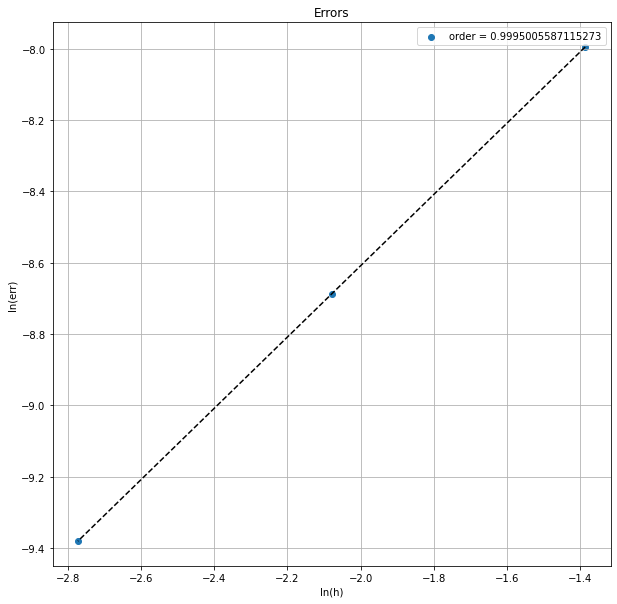

In [36]:
plot_errors(H, errs)
print(errs)

n = np.log(np.max(solutions[2][::4] - solutions[1][::2]) / np.max(solutions[1][::2] - solutions[0])) / np.log(2)
print(n)